In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_theme()
plt.rcParams['figure.figsize'] = [8,8]

In [4]:
throat = pd.read_csv("throat.csv")
throat

,Age,Sex,Lubricant,Duration,Device,SoreThroat
0,48,1,0,45,0,0
1,48,1,0,15,0,0
2,39,0,1,40,0,1
3,59,1,0,83,1,1
4,24,1,1,90,1,1
5,55,1,1,25,1,1
6,35,0,1,35,0,1
7,23,1,1,65,0,1
8,57,0,1,95,0,1
9,34,1,1,35,0,1


In [5]:
pi_null = throat["SoreThroat"].mean()
pi_null

0.6285714285714286

In [6]:
throat_null = np.log( pi_null / (1 - pi_null) )
throat_null

0.5260930958967791

In [7]:
throat_model = smf.glm("SoreThroat ~ Duration", data=throat, family=sm.families.Binomial())
throat_fit = throat_model.fit()
throat_fit.params

Intercept   -2.213582
Duration     0.070383
dtype: float64

In [8]:
1 - chi2.cdf(throat_fit.null_deviance - throat_fit.deviance, df=1)

0.0004007973384960728

In [9]:
transition = -throat_fit.params[0] / throat_fit.params[1]
transition

31.450620812871517

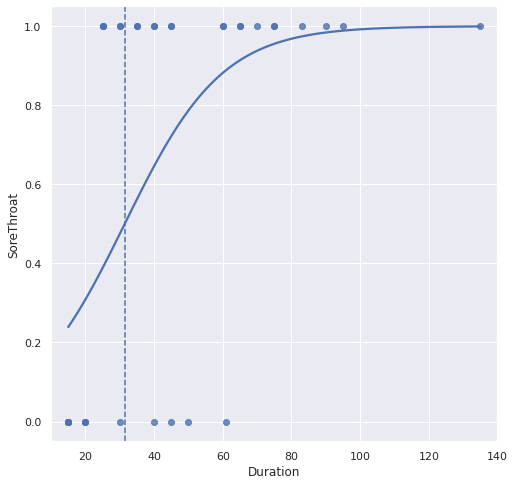

In [10]:
sns.regplot(data=throat, x="Duration", y="SoreThroat", logistic=True, ci=None)
plt.axvline( transition, linestyle='--')
plt.xlim(10,140)
plt.savefig("throat_fit.png")

In [11]:
R2_M = 1 - (throat_fit.deviance / throat_fit.null_deviance )
R2_M

0.2712976002620783

In [12]:
throat["Null_residual"] = throat["SoreThroat"] - pi_null
throat["Residual"] = throat["SoreThroat"] - throat_fit.fittedvalues
throat["Difference"] = throat_fit.fittedvalues - pi_null
R2_S = np.sum(throat["Difference"]**2) / np.sum(throat["Null_residual"]**2)
R2_S

0.31224924747701394

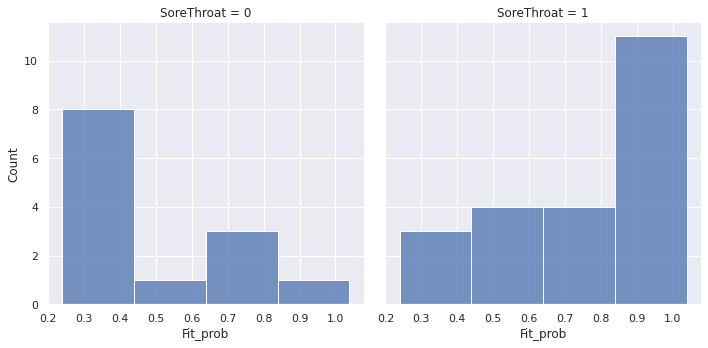

In [13]:
throat["Fit_prob"] = throat_fit.fittedvalues
sns.displot( data=throat, x="Fit_prob", col="SoreThroat", binwidth=0.2)
plt.savefig("throat_rd_hist.png")

In [14]:
fit_avgs = throat.groupby("SoreThroat").agg(Fit_average=('Fit_prob','mean'))
fit_avgs

,Fit_average
SoreThroat,
0,0.433820
1,0.743652


In [15]:
R2_D = fit_avgs["Fit_average"][1] - fit_avgs["Fit_average"][0]
R2_D

0.3098313956744167